# Install

In [ ]:
!pip3 install pshmodule

In [ ]:
!pip3 install pickle5

In [ ]:
!pip3 install pandas==1.5.0

In [ ]:
!pip3 install swifter

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Load

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/MemeProject/src/pytorch/preprocessing')
print(sys.path)

In [ ]:
from tqdm import tqdm
import config as cfg
import pandas as pd
import swifter
from pshmodule.utils import filemanager as fm

In [ ]:
df1 = fm.load(cfg.data_path_v1)
df2 = fm.load(cfg.data_path_v2)

extension : .xlsx
Loaded 21962 records from drive/MyDrive/MemeProject/data/row_data/meme_v1.xlsx
extension : .xlsx
Loaded 14640 records from drive/MyDrive/MemeProject/data/row_data/meme_v2.xlsx


In [ ]:
new_header = df1.iloc[1]
df1 = df1[2:]
df1.columns = new_header

Merge

In [ ]:
df1 = df1[['관리번호', 'utt',	'발화구분',	'대화소재', '화행(U)', '발화문',	'ARG1',	'ARG_op']]
df2 = df2[['관리번호', 'utt',	'발화구분',	'대화소재', '화행(U)', '발화문',	'ARG1',	'ARG_op']]

In [ ]:
df2.head()

,관리번호,utt,발화구분,대화소재,화행(U),발화문,ARG1,ARG_op
0,Aa0001,1,U,학교생활,자랑,나 중간고사 반에서 1등했어,중간고사,NaN
1,Aa0001,2,U,학교생활,자랑,중간고사 점수 내가 반에서 제일 잘 받음,중간고사,NaN
2,Aa0001,3,U,학교생활,자랑,나 반에서 중간 성적 제일 좋아,중간,NaN
3,Aa0001,4,U,학교생활,자랑,우리 반에서 내가 시험 제일 잘 봤다,시험,NaN
4,Aa0001,5,U,학교생활,자랑,중간고사 반 1등 먹음,중간고사,NaN


In [ ]:
print(len(df1))
print(len(df2))

21960
14640


In [ ]:
df_A = df2[df2['관리번호'].str.startswith('A')]
df_E = df2[df2['관리번호'].str.startswith('E')]

In [ ]:
df = pd.concat([df_A, df1, df_E])
df.reset_index(inplace=True, drop=True)

In [ ]:
df.shape

(36600, 8)

Numbering

In [ ]:
# no
num_list = [i+1 for i in range(len(df))]
df['num'] = num_list

# group no
g_list = []
num = 1
for i in range(len(df)):
  if i % 24 == 0 and i != 0:
    num += 1
  g_list.append(num)

df['g_num'] = g_list

In [ ]:
df = df[['num', 'g_num', 'utt', '발화구분',	'대화소재', '화행(U)', '발화문', 'ARG1', 'ARG_op']]
df.rename(columns={'발화구분':'type', '발화문':'u',	'대화소재':'material', '화행(U)':'speech', 'ARG1':'arg1', 'ARG_op':'arg_op'}, inplace=True)
df = df.fillna('')

In [ ]:
df.head()

,num,g_num,utt,type,material,speech,u,arg1,arg_op
0,1,1,1,U,학교생활,자랑,나 중간고사 반에서 1등했어,중간고사,
1,2,1,2,U,학교생활,자랑,중간고사 점수 내가 반에서 제일 잘 받음,중간고사,
2,3,1,3,U,학교생활,자랑,나 반에서 중간 성적 제일 좋아,중간,
3,4,1,4,U,학교생활,자랑,우리 반에서 내가 시험 제일 잘 봤다,시험,
4,5,1,5,U,학교생활,자랑,중간고사 반 1등 먹음,중간고사,


Reshape

In [ ]:
result = []
temp = []

for i in tqdm(df.iterrows()):
  temp.append([i[1]['num'], i[1]['g_num'], i[1]['utt'], i[1]['type'], i[1]['u'], i[1]['arg1'], i[1]['arg_op'], i[1]['material'], i[1]['speech']])
  
  if i[1]['num'] % 24 == 0 and i[1]['num'] != 0:
    temp_u = temp[:6]
    temp_cpr = temp[6:12]
    temp_mm = temp[12:18]
    temp_cpo = temp[18:24]

    for u in temp_u:
      # 밈 조합
      for cpr in temp_cpr:
        for mm in temp_mm:
          for cpo in temp_cpo:
            meme = "{} {} {}".format(cpr[4], mm[4], cpo[4]).strip()
            result.append([u[0], u[1], u[2], u[7], u[8], u[4], meme, u[5], u[6]])
    # 24개 씩 초기화
    temp = []

36600it [00:07, 4870.86it/s]


In [ ]:
len(result)

1976400

In [ ]:
df = pd.DataFrame(result, columns=[['num', 'g_num', 'u_num', 'material', 'speech', 'u', 'meme', 'arg1', 'arg_op']])

In [ ]:
df.head(10)

,num,g_num,u_num,material,speech,u,meme,arg1,arg_op
0,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,
1,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,
2,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,
3,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,
4,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,
5,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,
6,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 몫을 제일 많이 곁들인...,중간고사,
7,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 몫을 제일 많이 곁들인...,중간고사,
8,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 몫을 제일 많이 곁들인...,중간고사,
9,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 몫을 제일 많이 곁들인...,중간고사,


arg_op 쉼표 기준으로 쪼개기

In [ ]:
df['arg_op1'] = df.arg_op.swifter.apply(lambda x: x.str.split(',').str[0])
df['arg_op2'] = df.arg_op.swifter.apply(lambda x: x.str.split(',').str[1])

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.fillna('', inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df = df[['num', 'g_num', 'u_num', 'material', 'speech', 'u', 'meme', 'arg1', 'arg_op1', 'arg_op2']]

In [ ]:
df.head()

,num,g_num,u_num,material,speech,u,meme,arg1,arg_op1,arg_op2
0,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,,
1,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 몫을 제일 많이 곁들인...,중간고사,,
2,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 대춘이 몫도 곁들인...,중간고사,,
3,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 배보다 배꼽이 더 큰 걸 곁들인...,중간고사,,
4,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 과소비를 곁들인...,중간고사,,


In [ ]:
df.iloc[430:440]

,num,g_num,u_num,material,speech,u,meme,arg1,arg_op1,arg_op2
430,50,3,2,밈봇,혐오,대춘이 극혐,난 네가 참 좋아... 근데! 네가 너무 싫어... 하지만! 널 사랑해... 나한테...,대춘이,,
431,50,3,2,밈봇,혐오,대춘이 극혐,난 네가 참 좋아... 근데! 네가 너무 싫어... 하지만! 널 사랑해... 대길이...,대춘이,,
432,50,3,2,밈봇,혐오,대춘이 극혐,널 미워해... However! 널 갖고 싶어... 입덕은 빠를수록 좋다 명심해,대춘이,,
433,50,3,2,밈봇,혐오,대춘이 극혐,널 미워해... However! 널 갖고 싶어... 강한 부정은 강한 긍정이라던데....,대춘이,,
434,50,3,2,밈봇,혐오,대춘이 극혐,널 미워해... However! 널 갖고 싶어... 네 격한 입덕 부정기 잘~ 봤습니다,대춘이,,
435,50,3,2,밈봇,혐오,대춘이 극혐,널 미워해... However! 널 갖고 싶어... 이거 대길이 속마음?,대춘이,,
436,50,3,2,밈봇,혐오,대춘이 극혐,널 미워해... However! 널 갖고 싶어... 나한테 속마음 다 들켰쥬?,대춘이,,
437,50,3,2,밈봇,혐오,대춘이 극혐,널 미워해... However! 널 갖고 싶어... 대길이 특 : 진심이랑 반대로 말함,대춘이,,
438,50,3,2,밈봇,혐오,대춘이 극혐,I Hate you... Nevertheless! 너와 평생 함께하고 싶어... 입...,대춘이,,
439,50,3,2,밈봇,혐오,대춘이 극혐,I Hate you... Nevertheless! 너와 평생 함께하고 싶어... 강...,대춘이,,


Temp Save

In [ ]:
fm.save(cfg.origin_ref, df)

Saved 181704 records


# Reduce Class

In [6]:
import sys
sys.path.append('/content/drive/MyDrive/MemeProject/src/pytorch/preprocessing')
print(sys.path)

['/content', '/env/python', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/MyDrive/MemeProject/src/pytorch/preprocessing']


In [7]:
from tqdm import tqdm
import config as cfg
import pandas as pd
import swifter
from pshmodule.utils import filemanager as fm

In [8]:
df = fm.load(cfg.origin_ref)

extension : .pickle
Loaded 181704 records from drive/MyDrive/MemeProject/data/augmentation/origin_ref.pickle


In [9]:
df.head()

,num,g_num,u_num,material,speech,u,meme,arg1,arg_op1,arg_op2
0,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,,
1,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 몫을 제일 많이 곁들인...,중간고사,,
2,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 대춘이 몫도 곁들인...,중간고사,,
3,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 배보다 배꼽이 더 큰 걸 곁들인...,중간고사,,
4,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 과소비를 곁들인...,중간고사,,


Reduce Class

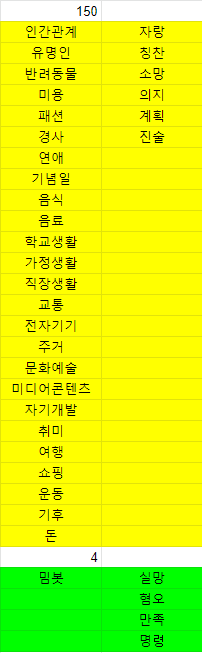

##### 대화소재

In [10]:
material = [i[0] for i in df.material.values.tolist()]

In [11]:
material = list(set(material))

In [12]:
material.remove('밈봇')
material.sort()

material_bot = []
material_bot.append('밈봇')

##### 화행

In [13]:
speech = [i[0] for i in df.speech.values.tolist()]

In [14]:
speech = list(set(speech))

In [15]:
speech.sort()

In [16]:
speech.remove('실망')
speech.remove('혐오')
speech.remove('만족')
speech.remove('명령')

speech_bot = []
speech_bot.append('만족')
speech_bot.append('명령')
speech_bot.append('실망')
speech_bot.append('혐오')

##### Combine

In [17]:
combine = []

for i in material:
  for j in speech:
    combine.append((i, j))

for ii in material_bot:
  for jj in speech_bot:
    combine.append((ii, jj))

##### Find key

In [18]:
com_dict = {v: k for k, v in enumerate(combine)}

In [19]:
print(com_dict)

{('가정생활', '계획'): 0, ('가정생활', '소망'): 1, ('가정생활', '의지'): 2, ('가정생활', '자랑'): 3, ('가정생활', '진술'): 4, ('가정생활', '칭찬'): 5, ('경사', '계획'): 6, ('경사', '소망'): 7, ('경사', '의지'): 8, ('경사', '자랑'): 9, ('경사', '진술'): 10, ('경사', '칭찬'): 11, ('교통', '계획'): 12, ('교통', '소망'): 13, ('교통', '의지'): 14, ('교통', '자랑'): 15, ('교통', '진술'): 16, ('교통', '칭찬'): 17, ('기념일', '계획'): 18, ('기념일', '소망'): 19, ('기념일', '의지'): 20, ('기념일', '자랑'): 21, ('기념일', '진술'): 22, ('기념일', '칭찬'): 23, ('기후', '계획'): 24, ('기후', '소망'): 25, ('기후', '의지'): 26, ('기후', '자랑'): 27, ('기후', '진술'): 28, ('기후', '칭찬'): 29, ('돈', '계획'): 30, ('돈', '소망'): 31, ('돈', '의지'): 32, ('돈', '자랑'): 33, ('돈', '진술'): 34, ('돈', '칭찬'): 35, ('문화예술', '계획'): 36, ('문화예술', '소망'): 37, ('문화예술', '의지'): 38, ('문화예술', '자랑'): 39, ('문화예술', '진술'): 40, ('문화예술', '칭찬'): 41, ('미디어콘텐츠', '계획'): 42, ('미디어콘텐츠', '소망'): 43, ('미디어콘텐츠', '의지'): 44, ('미디어콘텐츠', '자랑'): 45, ('미디어콘텐츠', '진술'): 46, ('미디어콘텐츠', '칭찬'): 47, ('미용', '계획'): 48, ('미용', '소망'): 49, ('미용', '의지'): 50, ('미용', '자랑'): 51, ('미용', '진술'): 52, ('미용', 

##### Lable Table Save

In [20]:
df_table = pd.DataFrame.from_dict(data=com_dict, orient='index')

In [21]:
df_table.reset_index(inplace=True)

In [22]:
df_table.rename(columns={'index':'name', 0:'index'}, inplace=True)

In [23]:
df_table.head()

,name,index
0,"(가정생활, 계획)",0
1,"(가정생활, 소망)",1
2,"(가정생활, 의지)",2
3,"(가정생활, 자랑)",3
4,"(가정생활, 진술)",4


In [24]:
fm.save(cfg.label, df_table)

file exists
exceptions must derive from BaseException


##### Make Label

In [25]:
class_list = []

for i in df.iterrows():
  class_list.append(com_dict[(i[1]['material'], i[1]['speech'])])

In [26]:
df['label'] = class_list

In [27]:
df.tail()

,num,g_num,u_num,material,speech,u,meme,arg1,arg_op1,arg_op2,label
181699,36582,1525,6,경사,자랑,전국노래자랑에서 이모가 1등했다,대길이 이모님... 힘숨찐ㄷㄷ 상상도 못한 정체 ㄴㅇㄱ,,전국노래자랑에서,,9
181700,36582,1525,6,경사,자랑,전국노래자랑에서 이모가 1등했다,대길이 이모님 힘숨찐이시네! 상상도 못한 정체 ㄴㅇㄱ,,전국노래자랑에서,,9
181701,36582,1525,6,경사,자랑,전국노래자랑에서 이모가 1등했다,대길이 이모님 힘숨찐이시라능 상상도 못한 정체 ㄴㅇㄱ,,전국노래자랑에서,,9
181702,36582,1525,6,경사,자랑,전국노래자랑에서 이모가 1등했다,대길좌 이모님이 우승자라구?! 상상도 못한 정체 ㄴㅇㄱ,,전국노래자랑에서,,9
181703,36582,1525,6,경사,자랑,전국노래자랑에서 이모가 1등했다,"대길쓰 이모님,, 힘숨찐ㄷㄷ 상상도 못한 정체 ㄴㅇㄱ",,전국노래자랑에서,,9


In [28]:
df = df[['num', 'g_num', 'u_num', 'u', 'label', 'material', 'speech']]

In [29]:
df.rename(columns={'u':'content'}, inplace=True)

<ipython-input-29-41d7377a9dbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'u':'content'}, inplace=True)


In [30]:
df.drop_duplicates(inplace=True)

<ipython-input-30-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [62]:
df = df[['material', 'speech', 'label']]

In [69]:
weights = [(150-i)/10 for i in df.value_counts()]

In [70]:
print(weights)

[0.0, 0.0, 0.0, 0.0, 0.6, 0.6, 2.4, 3.6, 4.2, 4.8, 4.8, 4.8, 5.4, 5.4, 5.4, 5.4, 5.4, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.6, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 8.4, 8.4, 8.4, 8.4, 9.0, 9.0, 9.0, 9.0, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.7, 10.2, 10.2, 10.2, 10.2, 10.2, 10.2, 10.2, 10.2, 10.2, 10.8, 10.8, 10.8, 10.8, 10.8, 10.8, 10.8, 10.8, 10.8, 10.8, 10.8, 10.8, 10.8, 10.8, 10.8, 10.8, 11.3, 11.4, 11.4, 11.4, 11.4, 11.4, 11.4, 11.4, 11.4, 11.4, 11.4, 11.4, 11.4, 11.4, 11.4, 11.4, 11.4, 11.4, 11.4, 11.4, 11.4, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.6, 12.6, 12.6, 12.6, 12.6, 12.6, 12.6, 12.6, 12.6, 12.6, 12.6, 13.2, 13.2, 13.2, 13.2, 13.2, 13.2, 13.2, 13.2, 13.8, 13.8, 13.8, 13.8, 13.8, 13.8, 13.8, 13.8, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4]


##### Train Save

In [ ]:
df = df[['content', 'label']]

In [ ]:
fm.save(cfg.train_data, df)

file exists
exceptions must derive from BaseException


In [ ]:
df = fm.load(cfg.train_data)

extension : .json
Loaded 7272 records from drive/MyDrive/MemeProject/data/train_test.json


In [ ]:
df.head()

,content,label
0,너 좋아해,116
1,대춘이 밈 잘 이용하네,116
2,오 은근 괜춘한데?,116
3,대춘쓰 성품이 정말 훌륭해,116
4,난 너 엄청 애정해!,116


# Under Sampling

In [31]:
df_150 = df[df.label.values == 150]
df_151 = df[df.label.values == 151]
df_152 = df[df.label.values == 152]
df_153 = df[df.label.values == 153]

df_150 = df_150.sample(frac=1).reset_index(drop=True)
df_151 = df_151.sample(frac=1).reset_index(drop=True)
df_152 = df_152.sample(frac=1).reset_index(drop=True)
df_153 = df_153.sample(frac=1).reset_index(drop=True)

df_150 = df_150[:150]
df_151 = df_151[:150]
df_152 = df_152[:150]
df_153 = df_153[:150]

In [32]:
df_drop_1 = df[df.label.values != 150]
df_drop_2 = df_drop_1[df_drop_1.label.values != 151]
df_drop_3 = df_drop_2[df_drop_2.label.values != 152]
df_drop = df_drop_3[df_drop_3.label.values != 153]

In [33]:
df = pd.concat([df_150, df_151, df_152, df_153, df_drop])

In [34]:
df.head()

,num,g_num,u_num,content,label,material,speech
0,22156,924,4,너 완전 상냥하구나?,150,밈봇,만족
1,9193,384,1,나는 너랑 친해져서 좋아,150,밈봇,만족
2,20787,867,3,야 너 한 귀여움 한다?,150,밈봇,만족
3,1324,56,4,대춘이 드립력 장난 아닌데,150,밈봇,만족
4,13369,558,1,대춘이 귀여워...,150,밈봇,만족


##### 건수 30 미만 제거

In [35]:
df_check = df[['material', 'speech', 'label']]

In [36]:
check = {i[1]['label']: 0 for i in df_check.iterrows()}

for i in df_check.iterrows():
  check[i[1]['label']] += 1

In [37]:
temp = sorted(check.items(), key=lambda x: x[1], reverse=True)

In [38]:
check_result = [i[0] for i in temp if i[1] >= 30]

In [39]:
df_list = []

for i in df.iterrows():
  if i[1]['label'] in check_result:
    df_list.append([i[1]['content'], i[1]['material'], i[1]['speech']])

df_result = pd.DataFrame(df_list, columns=['content', 'material', 'speech'])

In [40]:
df_result.head()

,content,material,speech
0,너 완전 상냥하구나?,밈봇,만족
1,나는 너랑 친해져서 좋아,밈봇,만족
2,야 너 한 귀여움 한다?,밈봇,만족
3,대춘이 드립력 장난 아닌데,밈봇,만족
4,대춘이 귀여워...,밈봇,만족


##### Class Redefinition

In [41]:
temp_comdict = {i[0]: i[1] for i in com_dict.items() if i[1] in check_result}

In [42]:
result_com_dict = {}
num = 0

for i in temp_comdict.items():
  result_com_dict[i[0]] = num
  num += 1

In [43]:
df_table = pd.DataFrame.from_dict(data=temp_comdict, orient='index')

In [44]:
df_table.reset_index(inplace=True)

In [45]:
df_table.rename(columns={'index':'name', 0:'index'}, inplace=True)

In [46]:
df_table.shape

(120, 2)

In [47]:
fm.save(cfg.under_label, df_table)

file exists
exceptions must derive from BaseException


##### Train Save

In [48]:
label = []

for i in df_result.iterrows():
  label.append(result_com_dict[(i[1]['material'], i[1]['speech'])])

In [49]:
df_result['label'] = label

In [50]:
df_result.head()

,content,material,speech,label
0,너 완전 상냥하구나?,밈봇,만족,116
1,나는 너랑 친해져서 좋아,밈봇,만족,116
2,야 너 한 귀여움 한다?,밈봇,만족,116
3,대춘이 드립력 장난 아닌데,밈봇,만족,116
4,대춘이 귀여워...,밈봇,만족,116


In [ ]:
fm.save(cfg.train_data, df_result)

In [52]:
df_result = df_result[['material', 'speech', 'label']]

In [57]:
temp = df_result.value_counts()

In [60]:
for i in temp:
  print(i)

150
150
150
150
144
144
126
114
108
102
102
102
96
96
96
96
96
90
90
90
90
90
90
90
84
78
78
78
78
78
78
78
72
72
72
72
72
72
72
66
66
66
66
60
60
60
60
54
54
54
54
54
54
54
54
54
54
54
54
53
48
48
48
48
48
48
48
48
48
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
37
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
30
30
30
30
30
30
30
30
30
30
30
30
30
30


file exists
exceptions must derive from BaseException


##### Ref

In [ ]:
df = fm.load(cfg.origin_ref)

extension : .pickle
Loaded 181704 records from drive/MyDrive/MemeProject/data/augmentation/origin_ref.pickle


In [ ]:
label = []

for i in df.iterrows():
  if (i[1]['material'], i[1]['speech']) in result_com_dict:
    label.append(result_com_dict[(i[1]['material'], i[1]['speech'])])
  else:
    label.append(999)

In [ ]:
df['label'] = label

In [ ]:
df.head()

,num,g_num,u_num,material,speech,u,meme,arg1,arg_op1,arg_op2,label
0,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,,,114
1,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 몫을 제일 많이 곁들인...,중간고사,,,114
2,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 대춘이 몫도 곁들인...,중간고사,,,114
3,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 배보다 배꼽이 더 큰 걸 곁들인...,중간고사,,,114
4,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 과소비를 곁들인...,중간고사,,,114


In [ ]:
fm.save(cfg.origin_class_ref, df)

Saved 181704 records
